In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

### Load dataset

In [7]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualize data

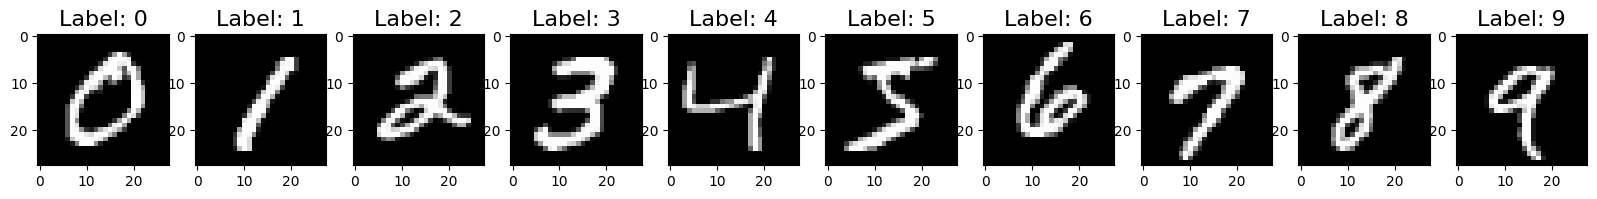

In [8]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Label: {}'.format(i), fontsize=16)

In [9]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [10]:
# one-hot vector encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### Prepare data

In [12]:
# Normalize data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [13]:
#Before reshaping
x_train[0].shape

(28, 28)

In [14]:
# Reshape data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [15]:
# After reshaping
x_train.shape

(60000, 784)

### Create model- Neural Network

In [16]:
model = Sequential()

model.add(Dense(units = 128, activation='relu', input_shape=(784,)))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Roninasaurus\AIML_python\AIML-Python-W2025\AIML-Python-W2025\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### Train

In [17]:
batch_size = 512
epochs = 10
model.fit(x = x_train, y=y_train, batch_size = batch_size, epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6912 - loss: 1.0420
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9302 - loss: 0.2418
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9501 - loss: 0.1748
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9595 - loss: 0.1384
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9679 - loss: 0.1045
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9735 - loss: 0.0913
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9763 - loss: 0.0790
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9789 - loss: 0.0686
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9820 - loss: 0.0589
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9833 - loss: 0.0537


### Evaluate

In [18]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0827
Test Loss: 0.07217225432395935
Test Accuracy: 0.9778000116348267


In [19]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.3073039e-06 7.4373150e-07 6.0576051e-05 ... 9.9927527e-01
  1.4903788e-06 9.5596479e-06]
 [2.1049534e-07 5.1545823e-05 9.9994457e-01 ... 6.2376864e-09
  2.8047569e-07 7.4394746e-10]
 [5.3191843e-07 9.9819428e-01 3.3931868e-04 ... 1.0269120e-03
  1.7595003e-04 6.0985776e-06]
 ...
 [5.9470073e-10 9.8474509e-09 7.1914230e-09 ... 1.7539707e-05
  4.1108515e-06 2.1154445e-05]
 [2.1472628e-08 1.6107027e-08 6.8474580e-11 ... 6.9279698e-09
  1.1232858e-04 1.4023420e-08]
 [2.2484500e-08 6.5749309e-11 4.0498318e-08 ... 7.8544940e-12
  1.1922692e-09 1.5543916e-10]]
[7 2 1 ... 4 5 6]


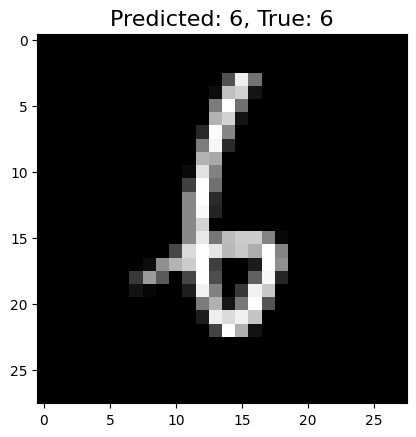

In [20]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('Predicted: {}, True: {}'.format(y_sample_pred_class, y_sample_true),
          fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')

### Confusion Matrix

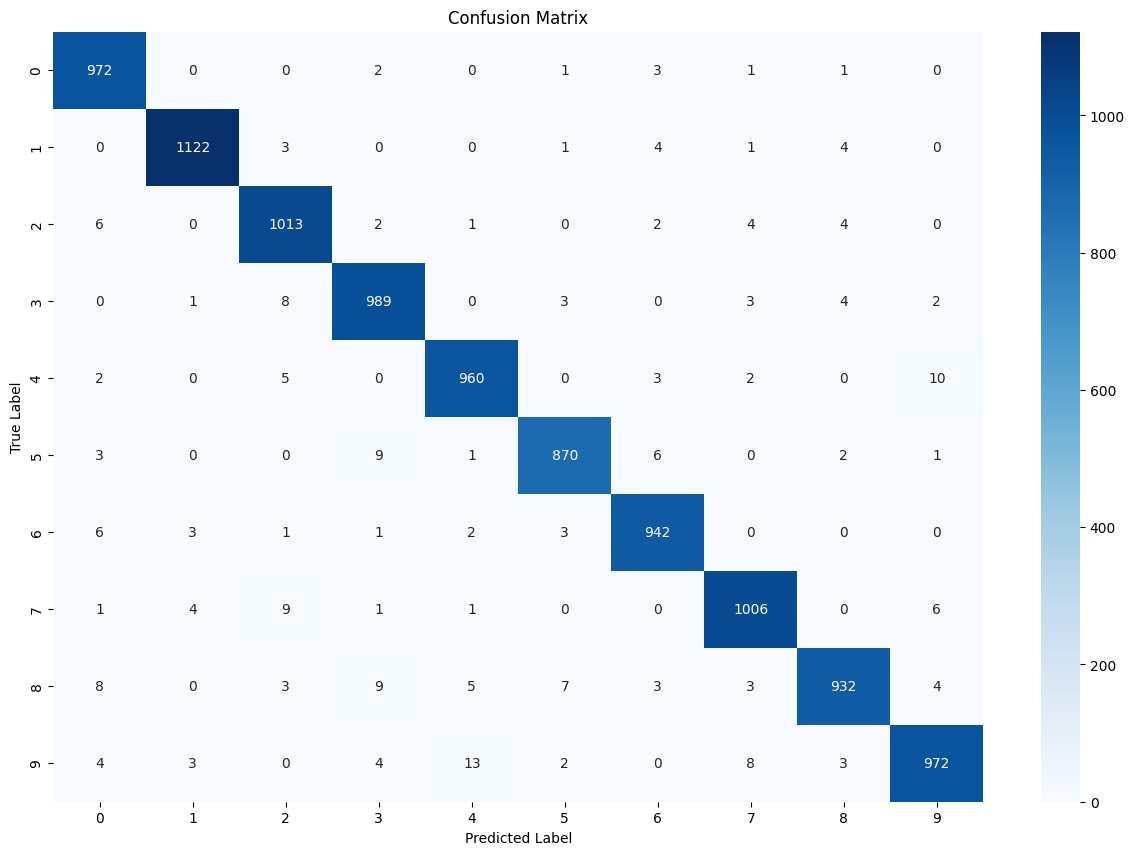

In [21]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap=plt.cm.Blues)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

### Investigate errors

In [22]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [23]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # Last 5 ones

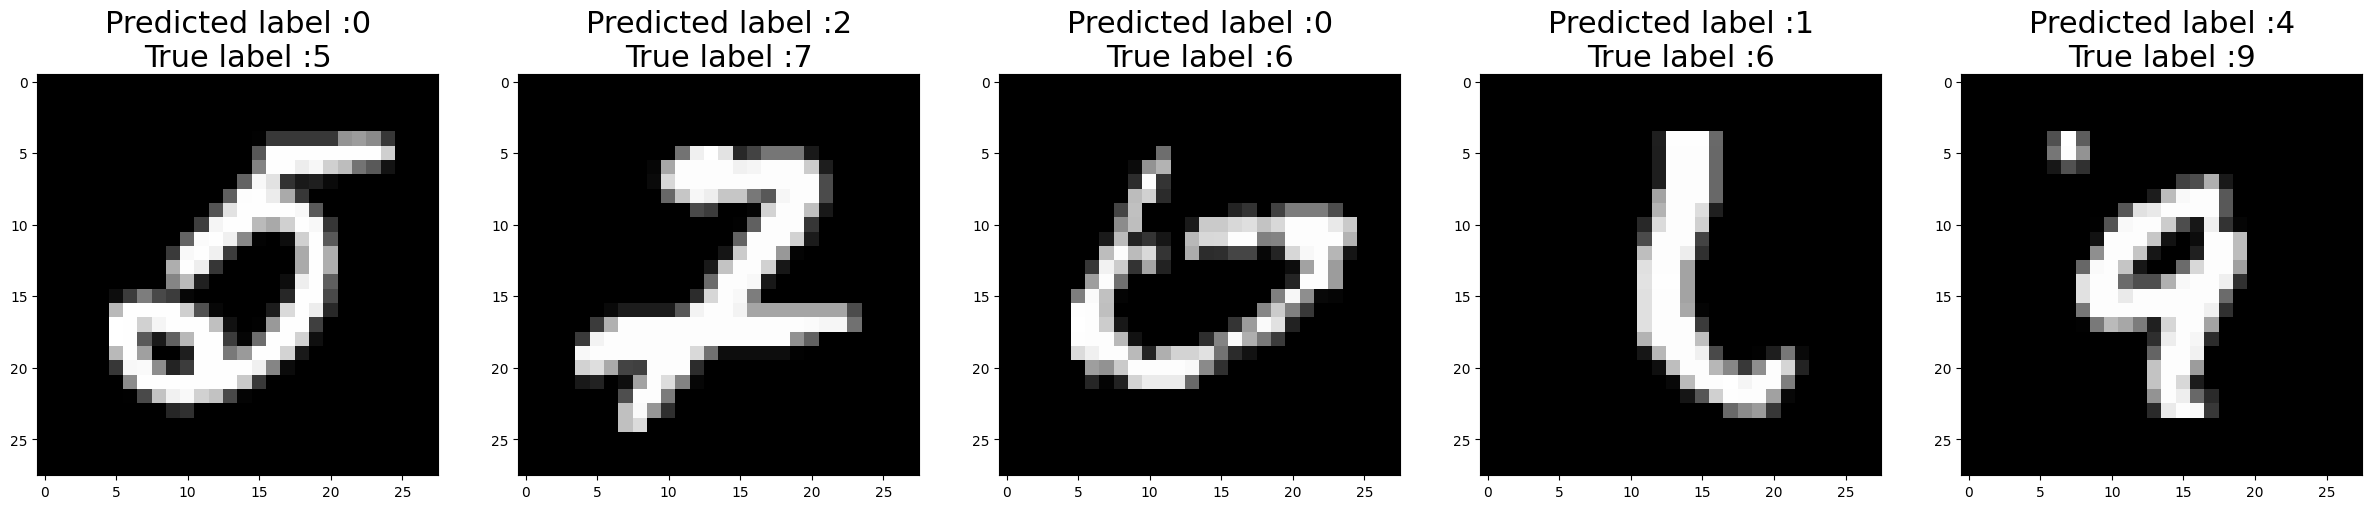

In [24]:
# Show top errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Predicted label :{}\nTrue label :{}'.format(y_p, y_t), fontsize=22)